In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
import torch.nn.functional as F
import tqdm
from tqdm import tnrange

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [5]:
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [6]:
split_data = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";")

data = split_data.to_list()

names = ["Fixed_acidity", "Volatile_acidity", "Citric_acid", "Residual_sugar", "Chlorides", "Free_sulfur_dioxide", "Total_sulfur_Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]

df2 = pd.DataFrame(data, columns=names)

In [7]:
df2.head()

,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


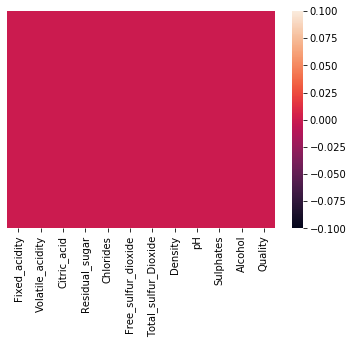

In [8]:
sn.heatmap(df2.isnull(), yticklabels=False)

In [9]:
df2.isnull().values.any() # no null values

False

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fixed_acidity         1599 non-null   object
 1   Volatile_acidity      1599 non-null   object
 2   Citric_acid           1599 non-null   object
 3   Residual_sugar        1599 non-null   object
 4   Chlorides             1599 non-null   object
 5   Free_sulfur_dioxide   1599 non-null   object
 6   Total_sulfur_Dioxide  1599 non-null   object
 7   Density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   Sulphates             1599 non-null   object
 10  Alcohol               1599 non-null   object
 11  Quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [12]:
df3 = df2.astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed_acidity         1599 non-null   float64
 1   Volatile_acidity      1599 non-null   float64
 2   Citric_acid           1599 non-null   float64
 3   Residual_sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free_sulfur_dioxide   1599 non-null   float64
 6   Total_sulfur_Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


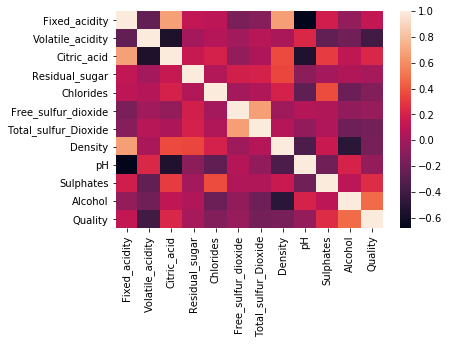

In [138]:
# corr matrix
sn.heatmap(df3.corr())
plt.show()

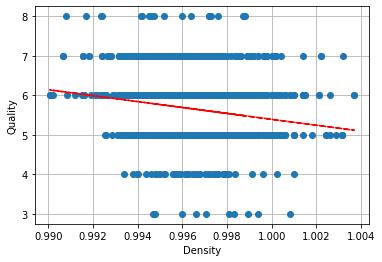

In [14]:
attribute="Density"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

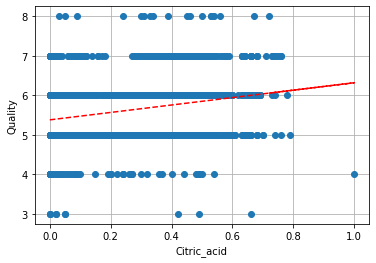

In [15]:
attribute="Citric_acid"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

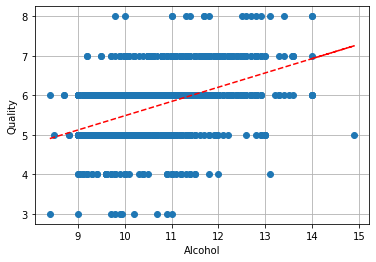

In [16]:
attribute="Alcohol"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

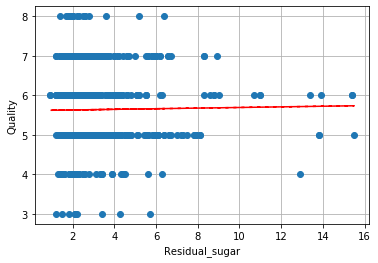

In [17]:
attribute="Residual_sugar"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [18]:
# Scale

quality_backup = df3["Quality"]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)
df_scaled['Quality'] = quality_backup #restore quality values
df_scaled.head()


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5.0


In [177]:
#Split.

train = df_scaled.iloc[:1300]
val = df_scaled.iloc[1300:1500]
test = df_scaled.iloc[1500:]

X_train, y_train= train.drop('Quality', axis=1), train['Quality']
print(X_train.shape)

X_val, y_val = val.drop('Quality', axis=1), val['Quality']
print(X_val.shape)

X_test, y_test = test.drop("Quality", axis=1), test["Quality"]

(1300, 11)
(200, 11)


In [377]:
f=7

train_batch = np.array_split(X_train, f) 
label_batch = np.array_split(y_train, f) # 50 sections/batches

val_batch = np.array_split(X_val, f)
val_label_batch = np.array_split(y_val, f)

test_batch = np.array_split(X_test,f) 
test_label_batch  = np.array_split(y_test, f)

In [378]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)
    
for i in range(len(val_batch)):
    val_batch[i] = torch.from_numpy(val_batch[i].values).float()
for i in range(len(val_label_batch)):
    val_label_batch[i] = torch.from_numpy(val_label_batch[i].values).float().view(-1, 1)
    
    
    
for i in range(len(test_batch)):
    test_batch[i] = torch.from_numpy(test_batch[i].values).float()
for i in range(len(test_label_batch)):
    test_label_batch[i] = torch.from_numpy(test_label_batch[i].values).float().view(-1, 1)
    
    
    

In [379]:
print(len(train_batch[0]))
print(len(label_batch))
print(len(val_batch))
print(len(val_label_batch))
print(len(train_batch[0][0]))

186
7
7
7
11


In [380]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(11, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)
       
        
      

    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        

        return x

### Notes:

1. optimizer.zero_grad() PyTorch's autograd simply accumulates the gradients for each model parameter. Thus for each epoch, one has to clear the existing gradients.

2. loss.backward() does the backward pass of the model and accumulates the gradients for each model parameter.

3. optimizer.step() computes the weight update for each model parameter and applies them.

In [414]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
train_losses, val_losses = [], []


scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.20)


for e in tnrange(epochs):
    
    model.train()
    train_loss = 0
    val_loss_1=0
    val_loss_sum = 0
    
    for i in range(len(train_batch)):
        
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = criterion(output, label_batch[i])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
        with torch.no_grad():
            
            for j in range(len(val_batch)):
                
                val_output = model(val_batch[j])
                val_loss =  criterion(val_output, val_label_batch[j])
                val_loss_1+=val_loss.item()
        val_loss_sum=val_loss_1/len(val_batch)
        
        
    print("Epoch :", e, "train_loss :", train_loss/len(train_batch), "Val loss: ", val_loss_sum/len(val_batch))    
    val_losses.append(val_loss_sum/len(val_batch))    
    train_losses.append(train_loss/len(train_batch))
    
    
    

/home/mainak09/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # This is added back by InteractiveShellApp.init_path()


Epoch : 0 train_loss : 28.942975180489675 Val loss:  26.710561752319336
Epoch : 1 train_loss : 25.31449454171317 Val loss:  23.212735351251098
Epoch : 2 train_loss : 19.833903993879044 Val loss:  17.86641784590118
Epoch : 3 train_loss : 12.280249050685338 Val loss:  10.733666702192656
Epoch : 4 train_loss : 4.486882277897426 Val loss:  3.8309299641725967
Epoch : 5 train_loss : 0.9438916529927935 Val loss:  1.237022302588638
Epoch : 6 train_loss : 1.8993405870028905 Val loss:  1.8001522008253603
Epoch : 7 train_loss : 1.3301696862493242 Val loss:  1.1567499473386882
Epoch : 8 train_loss : 0.9762007253510612 Val loss:  1.0725307026687934
Epoch : 9 train_loss : 0.9862546665327889 Val loss:  1.1161638534798914
Epoch : 10 train_loss : 0.8451506750924247 Val loss:  0.9758987451086238
Epoch : 11 train_loss : 0.8312627077102661 Val loss:  0.9311515311805569
Epoch : 12 train_loss : 0.8494330474308559 Val loss:  0.915391100912678
Epoch : 13 train_loss : 0.8242674129349845 Val loss:  0.8997346308

Epoch : 123 train_loss : 0.4517096493925367 Val loss:  0.5104871523015353
Epoch : 124 train_loss : 0.450968827520098 Val loss:  0.509635034872561
Epoch : 125 train_loss : 0.4502387174538204 Val loss:  0.5087929860669739
Epoch : 126 train_loss : 0.44951936176845003 Val loss:  0.5079608805933777
Epoch : 127 train_loss : 0.4488105944224766 Val loss:  0.5071388364446406
Epoch : 128 train_loss : 0.44811245799064636 Val loss:  0.5063267623891636
Epoch : 129 train_loss : 0.4474249269281115 Val loss:  0.5055246195014642
Epoch : 130 train_loss : 0.4467478905405317 Val loss:  0.504732364902691
Epoch : 131 train_loss : 0.44608130199568613 Val loss:  0.5039500858710737
Epoch : 132 train_loss : 0.4454251868384225 Val loss:  0.5031776273128937
Epoch : 133 train_loss : 0.44477943437440054 Val loss:  0.502415097489649
Epoch : 134 train_loss : 0.44414402757372173 Val loss:  0.5016623714140483
Epoch : 135 train_loss : 0.4435189281191145 Val loss:  0.50091944726146
Epoch : 136 train_loss : 0.442904059376

Epoch : 236 train_loss : 0.41928883109773907 Val loss:  0.4681919022482269
Epoch : 237 train_loss : 0.41925136532102314 Val loss:  0.4680956200677521
Epoch : 238 train_loss : 0.41921452965055195 Val loss:  0.46821864983256983
Epoch : 239 train_loss : 0.41918364592960905 Val loss:  0.4684113473916541
Epoch : 240 train_loss : 0.4191477256161826 Val loss:  0.46832061756630333
Epoch : 241 train_loss : 0.4191126142229353 Val loss:  0.4679507892958972
Epoch : 242 train_loss : 0.4190802574157715 Val loss:  0.46816083849692836
Epoch : 243 train_loss : 0.4190357966082437 Val loss:  0.4682652159613006
Epoch : 244 train_loss : 0.41901647618838717 Val loss:  0.46833991244131207
Epoch : 245 train_loss : 0.4189582977976118 Val loss:  0.4682013079219935
Epoch : 246 train_loss : 0.41895065563065664 Val loss:  0.46845124266585525
Epoch : 247 train_loss : 0.4189047728266035 Val loss:  0.4681308491497624
Epoch : 248 train_loss : 0.4189076806817736 Val loss:  0.46764438584142803
Epoch : 249 train_loss : 0

Epoch : 353 train_loss : 0.40935205136026653 Val loss:  0.4954683583001701
Epoch : 354 train_loss : 0.40870734197752817 Val loss:  0.49710787194115774
Epoch : 355 train_loss : 0.409054696559906 Val loss:  0.4972305878692744
Epoch : 356 train_loss : 0.408599602324622 Val loss:  0.5003699566028555
Epoch : 357 train_loss : 0.4088476853711264 Val loss:  0.5006475950382193
Epoch : 358 train_loss : 0.4090354527745928 Val loss:  0.49906977615794357
Epoch : 359 train_loss : 0.408222211258752 Val loss:  0.5018590259916929
Epoch : 360 train_loss : 0.40927874616214205 Val loss:  0.4997209049001032
Epoch : 361 train_loss : 0.40831428340503145 Val loss:  0.5007857485693329
Epoch : 362 train_loss : 0.40933893408094135 Val loss:  0.5006047408191525
Epoch : 363 train_loss : 0.40845413293157307 Val loss:  0.5021759855503939
Epoch : 364 train_loss : 0.4091337280614035 Val loss:  0.5043725085501768
Epoch : 365 train_loss : 0.40852146063532147 Val loss:  0.5064996775923943
Epoch : 366 train_loss : 0.41113

Epoch : 473 train_loss : 0.4078496992588043 Val loss:  0.5073624712472059
Epoch : 474 train_loss : 0.40784158025469097 Val loss:  0.5085457402224444
Epoch : 475 train_loss : 0.4078236222267151 Val loss:  0.5072065150859405
Epoch : 476 train_loss : 0.4078181726591928 Val loss:  0.5083575139240343
Epoch : 477 train_loss : 0.40780340347971233 Val loss:  0.5070390287710695
Epoch : 478 train_loss : 0.4077980262892587 Val loss:  0.5082060506149214
Epoch : 479 train_loss : 0.40778884291648865 Val loss:  0.5068644835632675
Epoch : 480 train_loss : 0.4077538933072771 Val loss:  0.5084729437925378
Epoch : 481 train_loss : 0.40776692969458445 Val loss:  0.506863314582377
Epoch : 482 train_loss : 0.407692836863654 Val loss:  0.5093164729828737
Epoch : 483 train_loss : 0.40788458926337107 Val loss:  0.5062958941775925
Epoch : 484 train_loss : 0.4081792873995645 Val loss:  0.5072242882178755
Epoch : 485 train_loss : 0.4080094184194292 Val loss:  0.5029738317338788
Epoch : 486 train_loss : 0.40733029

Epoch : 584 train_loss : 0.4078298509120941 Val loss:  0.4975734897414032
Epoch : 585 train_loss : 0.4072032485689436 Val loss:  0.501450561747259
Epoch : 586 train_loss : 0.40748651538576397 Val loss:  0.5000245026787933
Epoch : 587 train_loss : 0.4070040626185281 Val loss:  0.5037845911420121
Epoch : 588 train_loss : 0.4073517790862492 Val loss:  0.5048986268895013
Epoch : 589 train_loss : 0.40709024241992403 Val loss:  0.5070510728626835
Epoch : 590 train_loss : 0.4077973706381662 Val loss:  0.5083722043402341
Epoch : 591 train_loss : 0.4073197501046317 Val loss:  0.5025205864590042
Epoch : 592 train_loss : 0.40714490839413237 Val loss:  0.50292470473416
Epoch : 593 train_loss : 0.40750393697193693 Val loss:  0.5005194812404866
Epoch : 594 train_loss : 0.4070578856127603 Val loss:  0.505219747217334
Epoch : 595 train_loss : 0.40767958760261536 Val loss:  0.5071645461174906
Epoch : 596 train_loss : 0.40724819898605347 Val loss:  0.5056854647641279
Epoch : 597 train_loss : 0.407058183

Epoch : 698 train_loss : 0.40712311012404306 Val loss:  0.49530708090383174
Epoch : 699 train_loss : 0.4076281658240727 Val loss:  0.4978345884960525
Epoch : 700 train_loss : 0.4072753531592233 Val loss:  0.4971208648414028
Epoch : 701 train_loss : 0.4071016950266702 Val loss:  0.49853617196180383
Epoch : 702 train_loss : 0.40713096942220417 Val loss:  0.4984839811008804
Epoch : 703 train_loss : 0.40768831968307495 Val loss:  0.4947106318206203
Epoch : 704 train_loss : 0.40746825507708956 Val loss:  0.4932619737727301
Epoch : 705 train_loss : 0.40749733788626535 Val loss:  0.4947116794634838
Epoch : 706 train_loss : 0.4074990621634892 Val loss:  0.4943444075024858
Epoch : 707 train_loss : 0.4074478702885764 Val loss:  0.4959392939903298
Epoch : 708 train_loss : 0.40739502225603375 Val loss:  0.4966733802338036
Epoch : 709 train_loss : 0.40775073426110403 Val loss:  0.49770940657781093
Epoch : 710 train_loss : 0.4072858989238739 Val loss:  0.49787565640040804
Epoch : 711 train_loss : 0.

Epoch : 808 train_loss : 0.40876746603420805 Val loss:  0.4886062762566975
Epoch : 809 train_loss : 0.40912459577832905 Val loss:  0.49334832782648047
Epoch : 810 train_loss : 0.4105564994471414 Val loss:  0.4839185029268265
Epoch : 811 train_loss : 0.4077299577849252 Val loss:  0.49341291250014796
Epoch : 812 train_loss : 0.4093410074710846 Val loss:  0.4853360792812036
Epoch : 813 train_loss : 0.40806623867579866 Val loss:  0.49640335537949387
Epoch : 814 train_loss : 0.41013265933309284 Val loss:  0.48678297868796755
Epoch : 815 train_loss : 0.40729711736951557 Val loss:  0.49899453046370523
Epoch : 816 train_loss : 0.408935010433197 Val loss:  0.49209114179319263
Epoch : 817 train_loss : 0.4069657751492092 Val loss:  0.5000154765284791
Epoch : 818 train_loss : 0.407801342861993 Val loss:  0.495084392477055
Epoch : 819 train_loss : 0.4076261264937265 Val loss:  0.49748543877990875
Epoch : 820 train_loss : 0.40796540890421185 Val loss:  0.49079481618744986
Epoch : 821 train_loss : 0.

Epoch : 922 train_loss : 0.4069477915763855 Val loss:  0.49812248105905493
Epoch : 923 train_loss : 0.40797645279339384 Val loss:  0.49479617573777024
Epoch : 924 train_loss : 0.4070902722222464 Val loss:  0.49840968208653585
Epoch : 925 train_loss : 0.4074357237134661 Val loss:  0.4938722401857376
Epoch : 926 train_loss : 0.40693876998765127 Val loss:  0.4957443989661275
Epoch : 927 train_loss : 0.40716144868305754 Val loss:  0.495642040152939
Epoch : 928 train_loss : 0.40818325110844206 Val loss:  0.49511397949286867
Epoch : 929 train_loss : 0.40798783728054594 Val loss:  0.48834757141920987
Epoch : 930 train_loss : 0.4084629331316267 Val loss:  0.4918865388145252
Epoch : 931 train_loss : 0.40952074101993013 Val loss:  0.4835814322744097
Epoch : 932 train_loss : 0.40789655276707243 Val loss:  0.49189612117348885
Epoch : 933 train_loss : 0.4094401683126177 Val loss:  0.4833475098926194
Epoch : 934 train_loss : 0.4074093869754246 Val loss:  0.4925550897510684
Epoch : 935 train_loss : 0

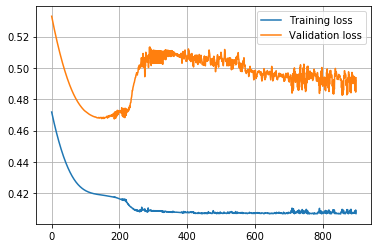

In [415]:
plt.plot(train_losses[100:], label='Training loss')
plt.plot(val_losses[100:], label='Validation loss')
plt.grid()
plt.legend()

In [416]:
print("Predicted Values:\n")
with torch.no_grad():
    for i in range(10):
        m = model(train_batch[0][i])
        print(round(m.item()))
        
df2.head(10)

Predicted Values:

5
5
5
6
5
5
5
5
5
6


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
8,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [418]:
correct=0
i=0
res=[]
with torch.no_grad():
    for batch in test_batch :
        for j in range(len(batch)):
            x = model(batch[j])
            #print(round(x.item()))
            res.append(round(x.item()))

true_labels= list(test["Quality"])

for i in range(len(res)):
    if res[i]==int(true_labels[i]):
        correct+=1
        
print("Accuracy:", correct/len(res))

Accuracy: 0.7272727272727273


## To Do:
1. Try oversampling to balance the classes.
2. Try a larger maodel.